In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

uri = "datasets/regressao_linear.csv"
movies = pd.read_csv(uri)
movies.head()
# type(movies) #para ver o que é

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
0,1,Toy Story (1995),11.048216,5623234.602
1,2,Jumanji (1995),14.927678,5714951.757
2,3,Grumpier Old Men (1995),27.114597,9524339.124
3,4,Waiting to Exhale (1995),4.994242,6331568.779
4,5,Father of the Bride Part II (1995),19.142246,6409617.277


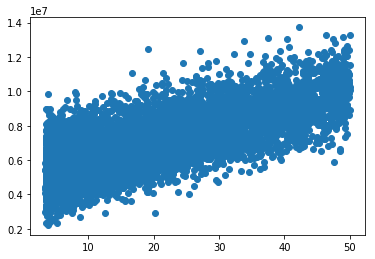

In [3]:
x = movies['Investimento (em milhoes)']
y = movies['Bilheteria (pessoas)']
plt.scatter(x,y)
#plt.show() #no terminal

In [4]:
sample = movies.sample(n=200) # smple(amostra) pega duzendo linhas aleatórias
# print(sample)
sample.head()

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
6174,34129,Rebound (2005),9.957382,7502442.317
2471,3075,Repulsion (1965),3.852112,5583590.991
801,992,"Rich Man's Wife, The (1996)",32.599173,8462824.898
4715,6593,Freaky Friday (2003),4.238629,6412961.312
7559,78574,Winter's Bone (2010),6.013676,5543317.485


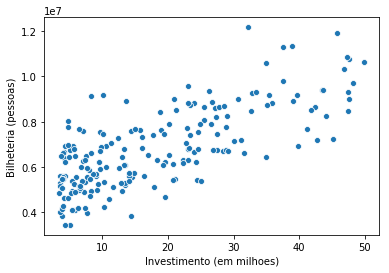

In [5]:
# usando seaborn pra visualizar
import seaborn as sns

x = sample['Investimento (em milhoes)']
y = sample['Bilheteria (pessoas)']
visualizacao = sns.scatterplot(x='Investimento (em milhoes)', y='Bilheteria (pessoas)', data=sample)
#print(visualizacao) #caso no terminal

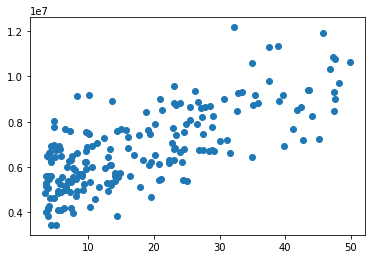

In [6]:
# usando o pyplot pra visualizar (quase a mesma coisa, mas prefiro usar o seaborn)

x = sample['Investimento (em milhoes)']
y = sample['Bilheteria (pessoas)']
plt.scatter(x,y)
# plt.show() #caso esteja no terminal

In [7]:
# separar dados de treino e dados de teste
from sklearn.model_selection import train_test_split

investimento = movies['Investimento (em milhoes)']
bilheteria = movies['Bilheteria (pessoas)'] 

x_train, x_test, y_train, y_test = train_test_split(investimento, bilheteria)

In [8]:
tam_x_train = len(x_train)
tam_x_test = len(x_test)
print('tamanho de x_train = ', tam_x_train, ' e tamanho de x_test = ', tam_x_test)
print('o dataset inteiro:', tam_x_train + tam_x_test)
print('x_train: %.2f%%' % (tam_x_train/len(movies) * 100))
print('x_test: %.2f%%' % (tam_x_test/len(movies) * 100))

tamanho de x_train =  6843  e tamanho de x_test =  2282
o dataset inteiro: 9125
x_train: 74.99%
x_test: 25.01%


In [9]:
import numpy as np

#type(x_train) # é Series, quero que ele seja um array, então...

x_train = np.array(x_train).reshape(tam_x_train,1)
x_test = np.array(x_test).reshape(tam_x_test, 1)
y_train = np.array(y_train).reshape(len(y_train),1)
y_test = np.array(y_test).reshape(len(y_test),1)

#type(x_train)
print(x_train)

[[23.01788029]
 [ 9.83952754]
 [ 7.17896728]
 ...
 [ 4.79362068]
 [43.11344543]
 [30.90435167]]


In [10]:
# criando o modelo
#obs.: para entender melhor onde cada package de importação funciona, as importações não estão no inicio.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# interceptação
model.intercept_

array([5071357.93559423])

In [12]:
# coeficiente
model.coef_

array([[98133.24910466]])

In [13]:
# quanto seria a bilheteria do filme zootopia, com investimento =  27.74456356 ?
n = [[27.74456356]]
model.predict(n)

array([[7794022.10272771]])

In [14]:
# a equação da reta (o filme Zootopia) 
model.coef_ * 27.74456356 + model.intercept_  
# o mesmo valor da predição
# mas falta ver as métricas verificar esses valores

array([[7794022.10272771]])

In [15]:
np.mean(y_train)

6690854.113302645

In [16]:
model.score(x_train, y_train)

0.5333816592362719